# Perceptron AND Gate Exercise

In this notebook, we will explore the use of a perceptron to solve the logical AND gate. The goal is to train a simple perceptron that can learn the AND operation from a given input dataset. We will start by defining the data and visualizing it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from IPython.display import HTML

## Defining and Visualizing the Input Data

In this section, we will define the dataset representing the AND gate and visualize it using a scatter plot to understand the data structure.

In [2]:
# Define the input data and target labels
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_labels = np.array([0, 0, 0, 1])

# Print input data and target labels
print("Input Data:")
print(input_data)

print("\nTarget Labels:")
print(target_labels)

Input Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Target Labels:
[0 0 0 1]


### Example Usage: Plotting the Data

We will use the previously defined function to plot the input data and visualize how the classes are distributed.

In [3]:
# Define the function to plot AND gate data
def plot_and_gate_data(input_data, labels):
    # Plot data points for Class 0 and Class 1
    plt.scatter(input_data[labels == 0, 0], input_data[labels == 0, 1],
                color='red', marker='o', label='Class 0')
    plt.scatter(input_data[labels == 1, 0], input_data[labels == 1, 1],
                color='blue', marker='x', label='Class 1')
    
    # Activate minor ticks on the grid
    plt.minorticks_on()
    
    # Activate grid with specified style
    plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
    
    # Set axis labels
    plt.xlabel('Feature A ($X_1$)')
    plt.ylabel('Feature B ($X_2$)')
    
    # Show legend
    plt.legend()
    
    # Display the plot
    plt.show()

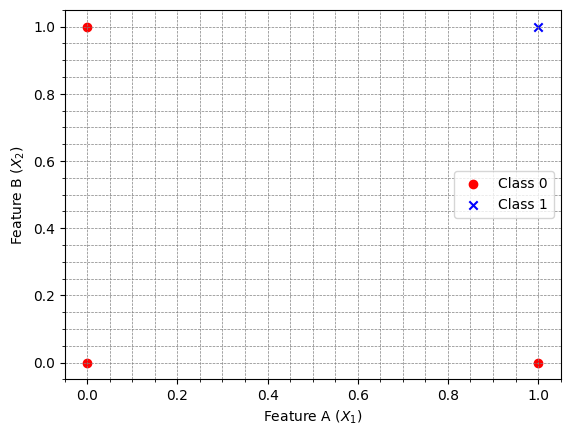

In [4]:
# Example usage
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_labels = np.array([0, 0, 0, 1])

plot_and_gate_data(input_data, target_labels)

## Defining the Perceptron Model

Here we will define the Perceptron class, which implements a classifier based on a simple perceptron. This class includes methods for initializing the model, training it, and making predictions.

In [5]:
class Perceptron:
    """Perceptron Classifier.

    Parameters
    ----------
    learning_rate : float
        Learning rate (between 0.0 and 1.0).
    n_iter : int
        Number of iterations over the training dataset.
    random_state : int
        Random seed for weight initialization.

    Attributes
    ----------
    weights_ : 1D array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    weights_historical : list
        List of weight vectors at each epoch for analysis purposes.
    """

    def __init__(self, learning_rate=0.01, n_iter=50, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
        # Random number generator for reproducibility
        rgen = np.random.RandomState(self.random_state)

        # Initialize weights to small random numbers
        self.weights_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        # Uncomment to use fixed weights for controlled demonstration
        # self.weights_ = np.array([-2.1, 0.75, 1.25])

        # Initialize errors and historical weights
        self.errors_ = []
        self.weights_historical = [self.weights_.copy()]

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self._update_weights(xi, target)
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.weights_historical.append(self.weights_.copy())

        return self

    def _update_weights(self, xi, target):
        """Apply perceptron weight update rule.

        Parameters
        ----------
        xi : array-like, shape = [n_features]
            Feature vector.
        target : int
            Target value.

        Returns
        -------
        update : float
            The update applied to weights.
        """
        update = self.learning_rate * (target - self.predict(xi))
        self.weights_[1:] += update * xi
        self.weights_[0] += update
        return update

    def net_input(self, X):
        """Calculate net input."""
        return np.dot(X, self.weights_[1:]) + self.weights_[0]

    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


### Training the Perceptron

We will instantiate the perceptron and train it with the defined dataset. We will use a learning rate of 0.75 and train the model for 20 iterations.

In [6]:
# Instantiate and train the perceptron model
ppn = Perceptron(learning_rate=0.75, n_iter=20)
ppn.fit(input_data, target_labels)

### Visualizing the Training Process

After training the model, we will visualize the initial weights and the historical weights during each epoch. This information will help us understand how the model adjusts its parameters over time.

In [7]:
# Visualize historical weights and errors
print("Initial weights:", ppn.weights_historical[0])
for epoch, weights in enumerate(ppn.weights_historical):
    print(f"Epoch {epoch}: Weights: {weights}")
print("\nErrors per epoch:", ppn.errors_)

Initial weights: [ 0.01624345 -0.00611756 -0.00528172]
Epoch 0: Weights: [ 0.01624345 -0.00611756 -0.00528172]
Epoch 1: Weights: [0.01624345 0.74388244 0.74471828]
Epoch 2: Weights: [-0.73375655  1.49388244  0.74471828]
Epoch 3: Weights: [-1.48375655  1.49388244  0.74471828]
Epoch 4: Weights: [-1.48375655  1.49388244  1.49471828]
Epoch 5: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 6: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 7: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 8: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 9: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 10: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 11: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 12: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 13: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 14: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 15: Weights: [-2.23375655  1.49388244  0.74471828]
Epoch 16: Weights: [-2.23375655  1.49388244  0

### Plotting the Number of Errors per Epoch

In this section, we will plot the number of errors (misclassifications) that occurred in each epoch. This will give us an idea of how the model is converging.

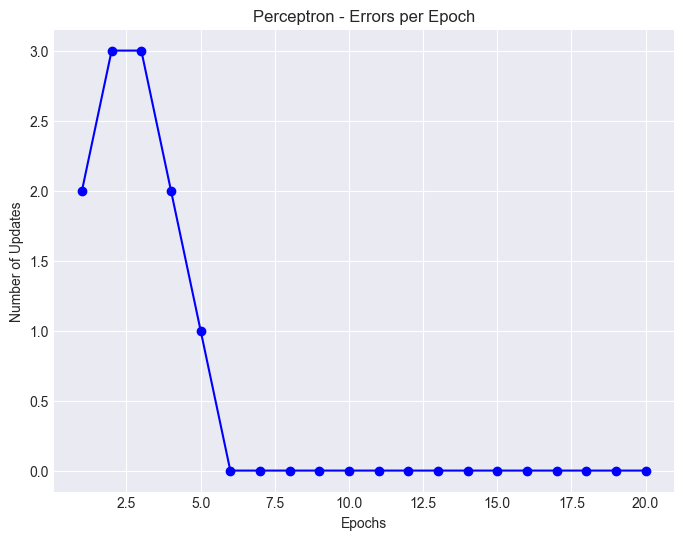

In [8]:
# Set style for better presentation
plt.style.use('seaborn-v0_8-darkgrid')

# Plot the number of misclassifications per epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o', linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.title('Perceptron - Errors per Epoch')
plt.grid(True)
plt.show()

## Visualizing the Decision Boundary

We will visualize the initial decision boundary of the perceptron using the function `plot_decision_boundary()`. This will allow us to see how the perceptron separates the two classes.

In [9]:
def plot_decision_boundary(X, ppn, title='Decision Boundary with Initial Weights'):
    # Plotting the data points for AND gate
    plt.figure(figsize=(8, 6))
    plt.scatter(X[0:3, 0], X[0:3, 1],
                color='red', marker='o', label='Class 0')
    plt.scatter(X[3, 0], X[3, 1],
                color='blue', marker='x', label='Class 1')

    # Enable grid and minor ticks
    plt.minorticks_on()
    plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

    # Extract minimum and maximum values for X1 (feature A)
    x1_min = np.min(X[:, 0])
    x1_max = np.max(X[:, 0])

    # Generate evenly spaced values for X1
    X1 = np.arange(x1_min - 0.1, x1_max + 0.1, 0.1)

    # Extract weights from perceptron
    vectorW_temp = ppn.weights_historical[0]
    b = vectorW_temp[0]
    w1 = vectorW_temp[1]
    w2 = vectorW_temp[2]

    # Calculate corresponding values for X2
    X2 = -(w1 / w2) * X1 - (b / w2)

    # Plot the decision boundary line
    plt.plot(X1, X2, color='green', linestyle='--', label='Initial Decision Boundary')

    # Set labels and title
    plt.xlabel('Feature A ($X_1$)')
    plt.ylabel('Feature B ($X_2$)')
    plt.title(title)
    
    # Add legend
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

### Example Usage: Plotting the Decision Boundary

"We will run the visualization function to observe the decision line generated by the trained perceptron weights.

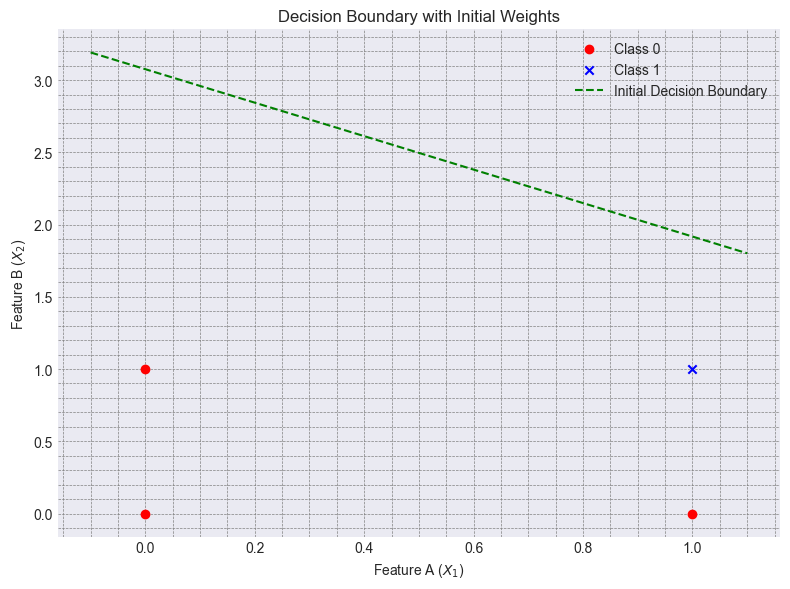

In [10]:
# Example usage of the plot_decision_boundary function
plot_decision_boundary(input_data, ppn)

## Animating the Evolution of the Decision Boundary

"In this section, we will use an animation to show how the decision boundary evolves during the perceptron's training. We use `matplotlib.animation` to create an interactive animation that allows us to see the process step by step.

In [11]:
# Define the plotting function to create an animated decision boundary
def plot_decision_boundary_animation(X, ppn):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Scatter plot of AND gate data
    ax.scatter(X[0:3, 0], X[0:3, 1], color='red', marker='o', label='Class 0')
    ax.scatter(X[3, 0], X[3, 1], color='blue', marker='x', label='Class 1')

    # Enable grid with minor ticks
    ax.minorticks_on()
    ax.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

    # Get min and max values for feature A (X1)
    x1_min = np.min(X[:, 0])
    x1_max = np.max(X[:, 0])

    # Generate evenly spaced values for X1
    X1 = np.arange(x1_min - 1, x1_max + 1, 0.1)

    # Set axis limits
    # ax.set_xlim(-2.5, 2.5)
    # ax.set_ylim(-2.5, 2.5)

    ax.set_xlim(x1_min - 1, x1_max + 1)  # Ajustar los límites para cubrir los puntos de datos
    ax.set_ylim(-3, 3)  # Ajustar según la dispersión de los datos


    # Set labels and legend
    ax.set_xlabel('Feature A ($X_1$)')
    ax.set_ylabel('Feature B ($X_2$)')
    ax.legend()
    
    # Initialize the line that will represent the decision boundary
    line, = ax.plot([], [], color='green', linestyle='--', label='Decision Boundary')
    
    # Function to initialize the plot
    def init():
        line.set_data([], [])
        ax.set_title('Initial Random Weights')
        return line,

    # Function to update the plot for each frame
    def update(epoch):
        weights = ppn.weights_historical[epoch]
        b = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        X2 = -(w1 / w2) * X1 - (b / w2)
        line.set_data(X1, X2)
        ax.set_title(f'Iteration {epoch}')
        return line,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=len(ppn.weights_historical),
                         init_func=init, blit=True, repeat=False)

    # Display the animation
    plt.tight_layout()
    return anim

### Matplotlib Configuration

This cell is used to configure `matplotlib` so that the plots are displayed properly within the notebook.

In [12]:
# Set up to use matplotlib notebook for interactive animations
%matplotlib inline

### Example Usage: Display the Animation

We will run the animation to see how the weights change over the iterations of training.

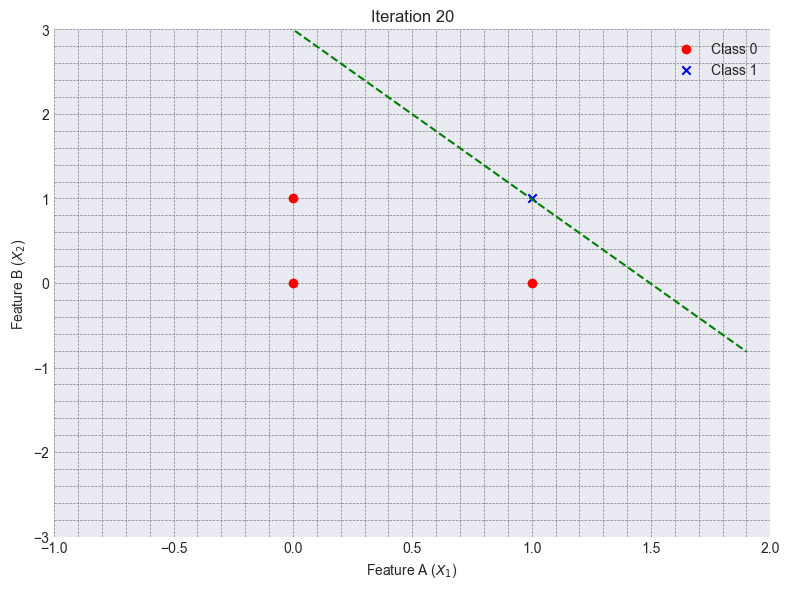

In [13]:
# Example usage of the function
anim = plot_decision_boundary_animation(input_data, ppn)

# Use IPython's display to show the animation properly in Jupyter Notebook
HTML(anim.to_jshtml())

## Visualizing the Decision Regions

We will plot the decision regions using a color-filled surface indicating which class would be predicted in each point of the two-dimensional plane. This will help us better understand how the model divides the feature space.

In [14]:
# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '*')  # Markers with filling to support edgecolor
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot the class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # Set plot labels and title
    plt.xlabel('Feature A ($X_1$)')
    plt.ylabel('Feature B ($X_2$)')
    plt.title('Decision Regions for Perceptron Classifier')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

### Plotting the Decision Regions

We will run the `plot_decision_regions` function to see how the perceptron segmented the different classes in the feature space.

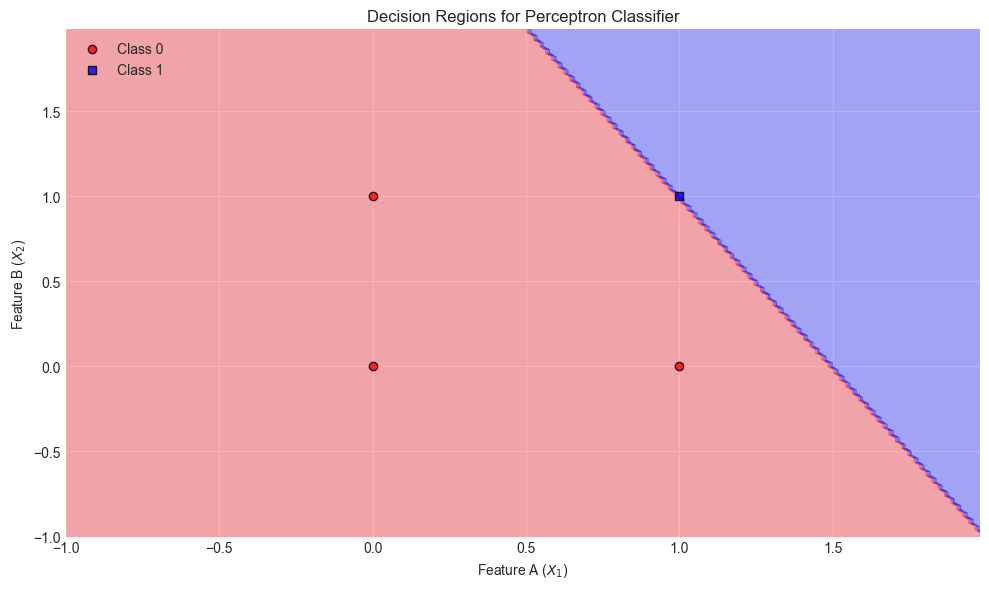

In [15]:
# Example usage with perceptron classifier
plot_decision_regions(input_data, target_labels, classifier=ppn)

## Predicting a New Sample

Finally, we will use the trained perceptron to make a prediction on a new sample. This will allow us to test the model and see how it classifies a new point in the feature space.

In [16]:
# Making a prediction for a new sample
new_sample = np.array([2, 1])
prediction = ppn.predict(new_sample.reshape(1, -1))
print(f"Prediction for {new_sample}: {prediction}")

Prediction for [2 1]: [1]
